# Augmentarea datelor

## Pași necesari:
### 1.Încărcarea setului de date;
### 2.Împărțirea setului de date:
####    * Setul de antrenare al datelor;
####    * Setul de date de validare;
####    * Setul de date de testare;
### 3.Augmentarea datelor;
### 4.Salveaza setului de date;

### Import

In [3]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from albumentations import HorizontalFlip, CoarseDropout, RandomBrightness, RandomContrast


### Încărcarea setului de date: imagini și măști:

In [4]:
def load_dataset(path):
    images = sorted(glob(os.path.join(path, "clean_images", "*")))
    masks = sorted(glob(os.path.join(path, "mask", "*")))
    return images, masks

### Împărțirea setului de date:

In [5]:
def split_dataset(images, mask, split=0.2):
    split_size = int(len(images) * split)
    
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)
    
    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)
    
    return (train_x, train_y),(valid_x, valid_y), (test_x, test_y)

### Salvarea setului de date:

#### Crearea unui folder

In [6]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [22]:
def save_dataset(images, masks, save_dir, augment=False):
    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = x.split("/")[-1].split(".")[0]
        
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)
        
        if augment == True:
            aug = HorizontalFlip(p=1)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]
            
            aug = CoarseDropout(p=1, max_holes=10, max_height=32, max_width=32)
            augmented = aug(image=x, mask=y)
            x2 = augmented["image"]
            y2 = augmented["mask"]
            
            aug = RandomBrightness(p=1.0)
            augmented = aug(image=x, mask=y)
            x3 = augmented["image"]
            y3 = augmented["mask"]
            
            aug = RandomContrast(p=1.0)
            augmented = aug(image=x, mask=y)
            x4 = augmented["image"]
            y4 = augmented["mask"]
             
            aug_x = [x, x1, x2, x3, x4]
            aug_y = [y, y1, y2, y3, y4]
            
        else:
            aug_x = [x]
            aug_y = [y]
            
        idx = 0
        for ax, ay in zip(aug_x, aug_y):
            aug_name = f"{name}_{idx}.png"
            
            save_image_path = os.path.join(save_dir, "images", aug_name)
            save_mask_path = os.path.join(save_dir, "masks", aug_name)
        
            cv2.imwrite(save_image_path, ax)
            cv2.imwrite(save_mask_path, ay)
            
            idx += 1

### Executarea programului

##### Încărcarea setului de date

In [8]:
dataset_path = "/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare"

In [9]:
images, masks = load_dataset(dataset_path)
print(f"Images: {len(images)} - Masks: {len(masks)}")

Images: 100 - Masks: 100


In [10]:
for x, y, in zip(images, masks):
    print(x, y)

/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/clean_images/100.jpg /Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/mask/100.jpg
/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/clean_images/101.jpg /Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/mask/101.jpg
/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/clean_images/102.jpg /Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/mask/102.jpg
/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/clean_images/103.jpg /Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/mask/103.jpg
/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/clean_images/113.jpg /Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/mask/113.jpg
/Users/taras_lara/Desktop/study/Master/an1 /Sem2/Activitate de Cercetare/clean_images/119.jpg /Users

### Vizualizarea imaginilor și a măștilor:

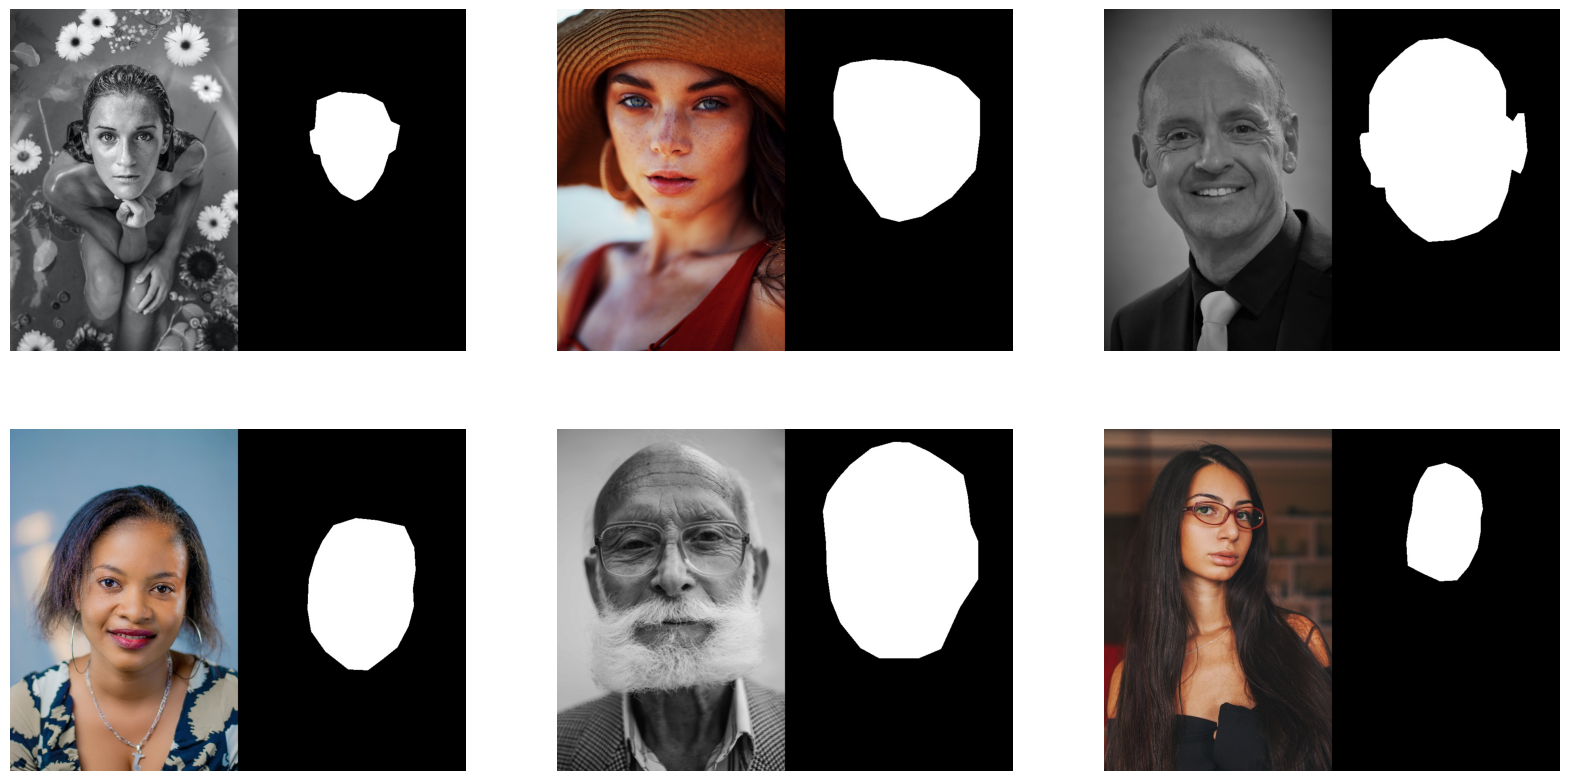

In [11]:
from imshowtools import imshow

cat = []
for x, y, in zip(images[:6], masks[:6]):
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    y = cv2.imread(y, cv2.IMREAD_COLOR)
    z = np.concatenate([x, y], axis=1)
    cat.append(z)
    
imshow(*cat, size=(20, 10), columns=3)

### Împărțirea datelor

In [12]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = split_dataset(images, masks, split=0.2)

In [13]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test: {len(test_x)} - {len(test_y)}")

Train: 60 - 60
Valid: 20 - 20
Test: 20 - 20


### Salvarea datelor:
#### 1.Crearea fișierelor:

In [14]:
save_dir = os.path.join("dataset", "aug")
for item in ["train", "valid", "test"]:
    create_dir(os.path.join(save_dir, item, "images"))
    create_dir(os.path.join(save_dir, item, "masks"))

#### 2.Salvarea setului de antrenare

In [23]:
save_dataset(train_x, train_y, os.path.join(save_dir, "train"), augment=True)

100%|███████████████████████████████████████████| 60/60 [00:06<00:00,  9.42it/s]


#### 3.Salvarea setului de validare

In [24]:
save_dataset(valid_x, valid_y, os.path.join(save_dir, "valid"), augment=False)

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 40.46it/s]


#### 4. Salvarea setului de testare

In [25]:
save_dataset(test_x, test_y, os.path.join(save_dir, "test"), augment=False)

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 39.49it/s]
